# Tesla Financial Data Retrieval and Processing

## Question 1:

In [3]:
!pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ...done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=7faf22ee34523c1da8afd0674787f99ec16dc23c0681edbab17ecb5d6b236005
  Stored in directory: /Users/haritha/Library/Caches/pip/wheels/1e/df/0f/e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
  Created wheel for peewee: filename=peewee-3.18.2-cp313-cp313-macosx_10_13_universal2.whl size=432873 sha256=10a6356b658b7bdfca80be1d07c526dcc208da392308417741597d07423b568c
  Stored in directory: /Users/haritha/Library/Caches/pip/wheels/1c/48/cc/00b7d0e7defa21a58915654917c89eaedd32a6e614d8e4ad92
Successfully built multitasking peewee

[notice] A new release o

In [4]:
!pip install yfinance beautifulsoup4 requests


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import yfinance as yf
import pandas as pd
tesla_data = yf.download('TSLA')
tesla_data.reset_index(inplace=True)
tesla_data.to_csv("Tesla_Stock_Data.csv", index=False)
print("First 5 rows of Tesla stock data:")
print(tesla_data.head())

/var/folders/lj/mc7qc3810r91rpwrn90snz0m0000gn/T/ipykernel_2110/1944080312.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA')
[*********************100%***********************]  1 of 1 completed

First 5 rows of Tesla stock data:
Price        Date       Close        High         Low        Open     Volume
Ticker                   TSLA        TSLA        TSLA        TSLA       TSLA
0      2025-07-09  295.880005  300.149994  293.549988  297.549988   75586800
1      2025-07-10  309.869995  310.480011  300.000000  300.049988  104365300
2      2025-07-11  313.510010  314.089996  305.649994  307.890015   79236400
3      2025-07-14  316.899994  322.600006  312.670013  317.730011   78043400
4      2025-07-15  310.779999  321.200012  310.500000  319.679993   77556300


## Question 2:

In [8]:
import requests
from bs4 import BeautifulSoup
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            if revenue != "" and revenue != "Revenue":
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"\$", "", regex=True).str.replace(",", "")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
print("Last 5 rows of Tesla revenue data:")
print(tesla_revenue.tail())

Last 5 rows of Tesla revenue data:
Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 3:

In [9]:
import yfinance as yf
import pandas as pd
gme_data = yf.download('GME')
gme_data.reset_index(inplace=True)
gme_data.to_csv("GME_Stock_Data.csv", index=False)
print("First 5 rows of GME stock data:")
print(gme_data.head())

/var/folders/lj/mc7qc3810r91rpwrn90snz0m0000gn/T/ipykernel_2110/2218425539.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME')
[*********************100%***********************]  1 of 1 completed

First 5 rows of GME stock data:
Price        Date      Close       High        Low       Open    Volume
Ticker                   GME        GME        GME        GME       GME
0      2025-07-09  23.190001  23.600000  22.530001  22.879999  14641400
1      2025-07-10  23.100000  23.330000  23.010000  23.040001   5991000
2      2025-07-11  23.330000  24.049999  23.129999  23.129999  11454100
3      2025-07-14  23.700001  23.840000  23.389999  23.440001   7769600
4      2025-07-15  23.219999  23.680000  23.170000  23.660000   7321600


## Question 4:

In [10]:
import requests
from bs4 import BeautifulSoup
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in soup.find_all("table"):
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            if revenue and revenue != "Revenue":
                gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"\$", "", regex=True).str.replace(",", "")
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
print("Last 5 rows of GME revenue data:")
print(gme_revenue.tail())

Last 5 rows of GME revenue data:
Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 5:

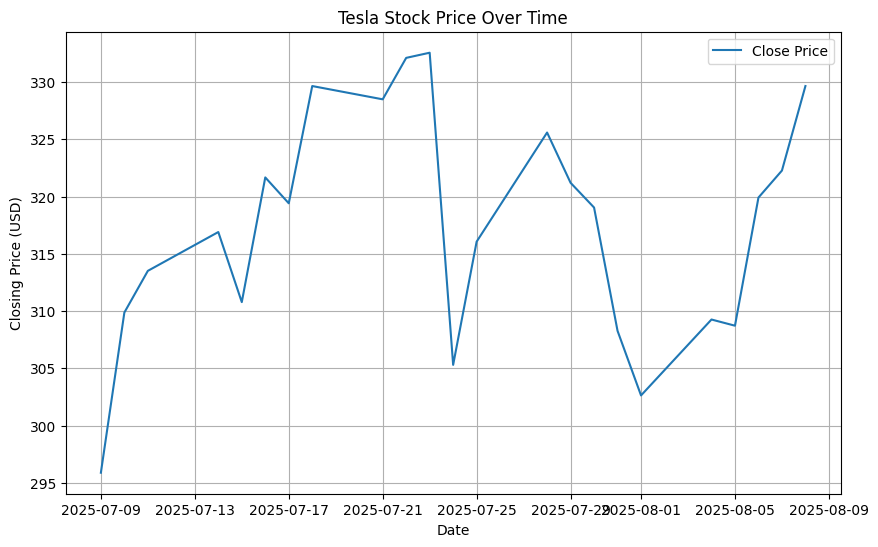

In [11]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10,6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
make_graph(tesla_data, "Tesla Stock Price Over Time")

## Question 6:

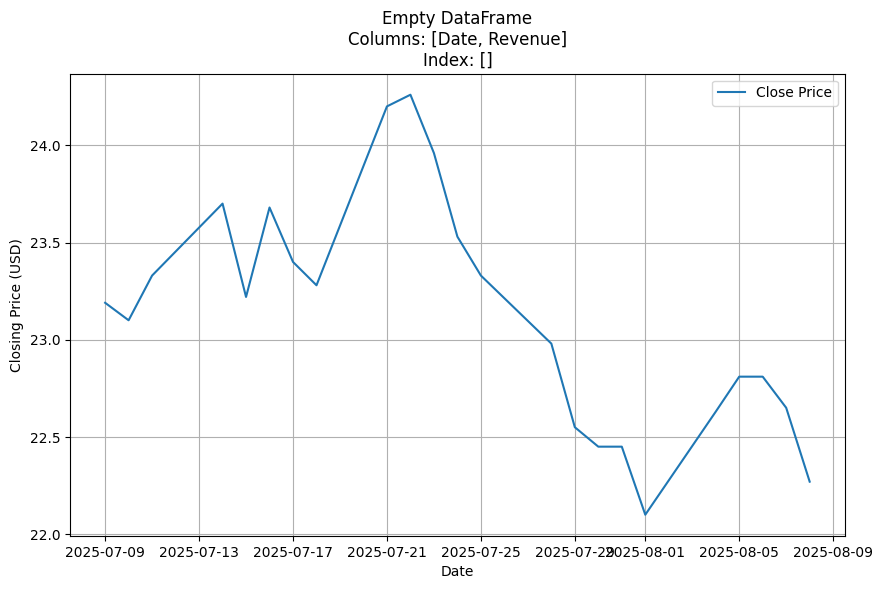

In [15]:
make_graph(gme_data, gme_revenue)